In [ ]:
import pandas as pd

df3 = pd.read_csv('../Data/Data_3.csv')
print(df3.head())

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


In [2]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [3]:
df3.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [4]:
print(df3.dtypes)

Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object


In [5]:

print(df3.describe())

       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e

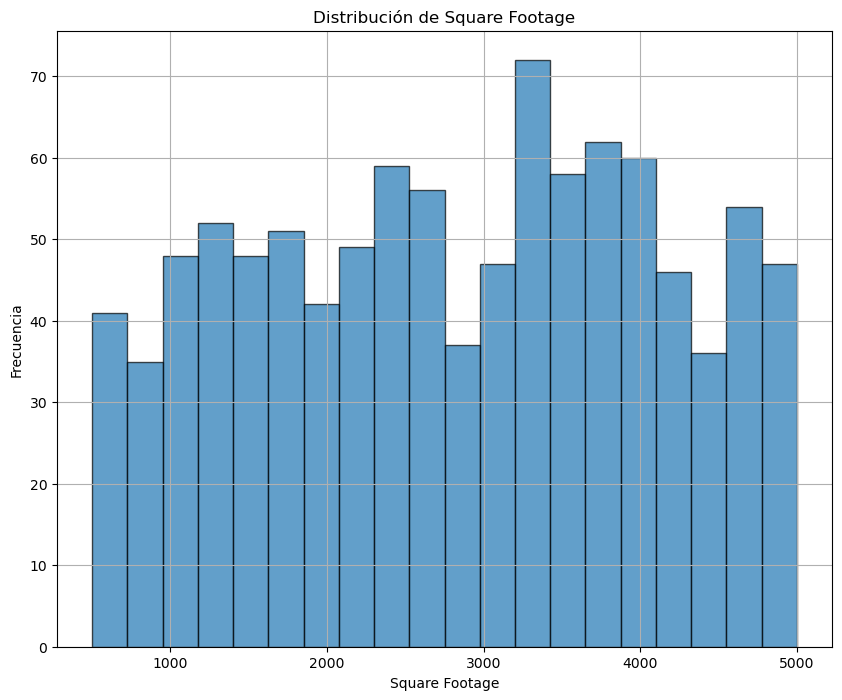

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(df3['Square_Footage'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [7]:
import plotly.express as px

fig = px.box(df3, y = 'Lot_Size', title='Distribución de Lot Size')
fig.show()

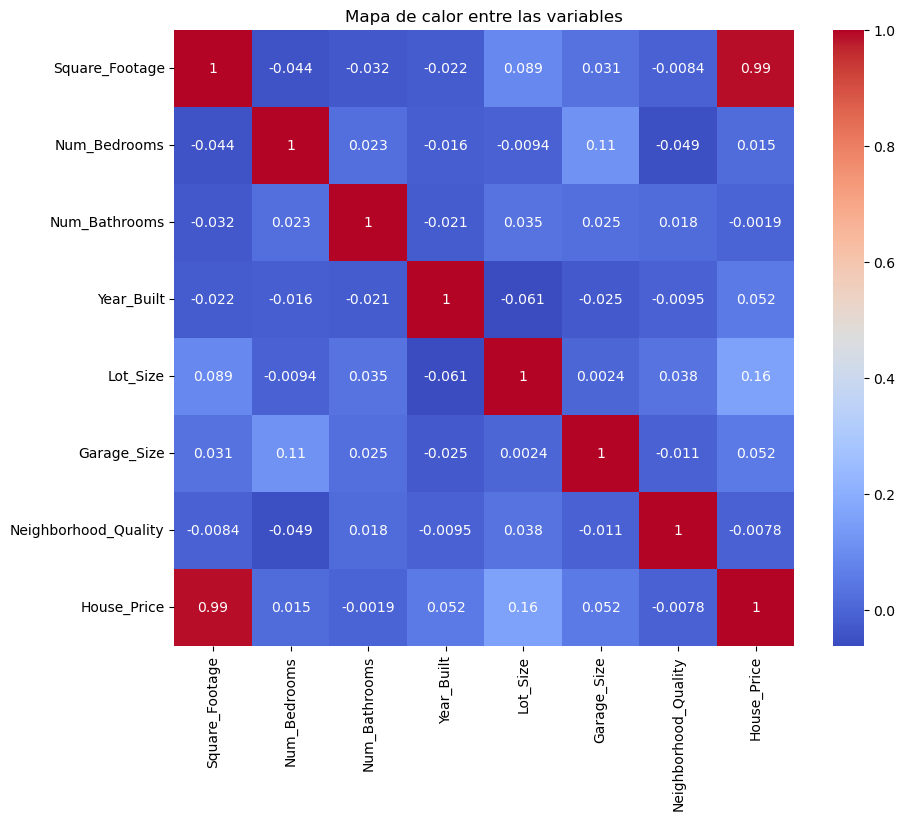

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

In [9]:
# Hago los modelos predictivos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df3 = pd.read_csv('../Data/house_price_regression_dataset.csv')

#Selecciono la variable objetivo y la separo
X = df3.drop('House_Price', axis = 1) 
y = df3['House_Price'] 

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creo los modelos
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesamiento definido previamente
    ('regressor', LinearRegression())
])

pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(criterion='squared_error', max_depth=None, random_state=42))
])

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(eval_metric='rmse', random_state=42))
])

# Entreno los modelos
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

# Hago las predicciones
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

# Evalúo los modelos
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_KNN = mean_squared_error(y_test, y_pred_KNN)
mse_DT = mean_squared_error(y_test, y_pred_DT)
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)

r2_LR = r2_score(y_test, y_pred_LR)
r2_KNN = r2_score(y_test, y_pred_KNN)
r2_DT = r2_score(y_test, y_pred_DT)
r2_RF = r2_score(y_test, y_pred_RF)
r2_XGB = r2_score(y_test, y_pred_XGB)

# Puedo hacer un diccionario para mostrar los resultados
results = {
    'Model': ["Linear Regression", "KNN Regressor", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost Regressor"],
    "Mean Squared Error": [mse_LR, mse_KNN, mse_DT, mse_RF, mse_XGB],
    "R2 Score": [r2_LR, r2_KNN, r2_DT, r2_RF, r2_XGB]
}

results_df = pd.DataFrame(results)
print(results_df)

                     Model  Mean Squared Error  R2 Score
0        Linear Regression        1.014348e+08  0.998426
1            KNN Regressor        6.986408e+09  0.891614
2  Decision Tree Regressor        9.891641e+08  0.984654
3  Random Forest Regressor        3.941545e+08  0.993885
4        XGBoost Regressor        3.070362e+08  0.995237


In [11]:
from sklearn.model_selection import cross_val_score
# Validación cruzada 
scores_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=5, scoring='r2')
print("Linear Regression - Mean R2:", scores_LR.mean())
print("Linear Regression - Std R2:", scores_LR.std())

scores_KNN = cross_val_score(pipeline_KNN, X_train, y_train, cv=5, scoring='r2')
print("K-Nearest Neighbors Regressor - Mean R2:", scores_KNN.mean())
print("K-Nearest Neighbors Regressor - Std R2:", scores_KNN.std())

scores_DT = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring='r2')
print("Decision Tree Regressor - Mean R2:", scores_DT.mean())
print("Decision Tree Regressor - Std R2:", scores_DT.std())

scores_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=5, scoring='r2')
print("Random Forest Regressor - Mean R2:", scores_RF.mean())
print("Random Forest Regressor - Std R2:", scores_RF.std())

scores_XGB = cross_val_score(pipeline_XGB, X_train, y_train, cv=5, scoring='r2')
print("XGBoost Regressor - Mean R2:", scores_XGB.mean())
print("XGBoost Regressor - Std R2:", scores_XGB.std())

Linear Regression - Mean R2: 0.9985166137865891
Linear Regression - Std R2: 0.00011539231595505023
K-Nearest Neighbors Regressor - Mean R2: 0.8856570987490848
K-Nearest Neighbors Regressor - Std R2: 0.010217971328933227
Decision Tree Regressor - Mean R2: 0.9835255303243258
Decision Tree Regressor - Std R2: 0.0012928265830173973
Random Forest Regressor - Mean R2: 0.9919032439774312
Random Forest Regressor - Std R2: 0.0011019034797294595
XGBoost Regressor - Mean R2: 0.9940468451527584
XGBoost Regressor - Std R2: 0.0004854231724119797
